In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn
from IPython.display import display
%matplotlib inline

# 線形モデル

w[0]: 0.393906  b: -0.031804


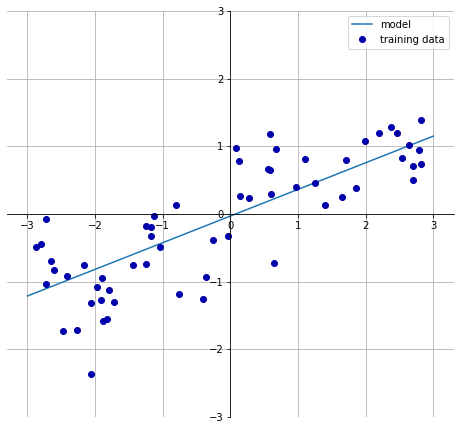

In [3]:
mglearn.plots.plot_linear_regression_wave()

直線で予測するのは制約が強すぎるかもしれないが、多数の特徴量を持つデータに対しては線形モデルは強力である

### 通常最小2乗法(Ordinary Least Squares : OLS)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [5]:
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_{}".format(lr.intercept_))

lr.coef_:[0.39390555]
lr.intercept_-0.031804343026759746


訓練データから得られた属性にはすべて最後にアンダ―スコア( _ )をつけることが習慣になっている。
そのため、coef_ 、intercept_ などとあらわしている。
ちなみに、coef(coefficient)は係数を、interceptは切片を示している

In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


上より訓練セットスコアとテストセットスコアが非常に近い。よってこれは適合不足であり、過剰適合ではないことを意味する。
高次元のデータに対しては、線形モデルはより強力になるため、過剰適合が起こる可能性が高くなる

In [7]:
X, y =mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [8]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


上より訓練セットとテストセットで大きく異なっているのは過剰適合が起きている明らかな兆候である。（ 上のデータは104の特徴量を持っているため、次元が大きくなっている ）

### リッジ回帰

リッジ回帰では、係数の絶対値の大きさを可能な限り小さくする。  
この制約条件は、正則化（ regularization ）の一例である。  
リッジ回帰で用いられている正則化はL2正則化と呼ばれる。

In [9]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


LinearRegressionの場合より訓練セットのスコアは低く、テストセットのスコアは高い。  
線形回帰では過剰適合していたがリッジ回帰により過剰適合の危険性を少なくすることができた。  
ここではalphaはデフォルトの1.0を用いた。

In [10]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score:{:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score:{:.2f}".format(ridge10.score(X_test, y_test)))

Training set score:0.79
Test set score:0.64


alphaを小さくすると係数の制約が小さくなる。そのため過剰適合の方に近づく。  
alphaが非常に小さな値になると線形回帰（LinearRegression）と同じような挙動となる。  
alphaを大きくすると係数の制約が大きくなる。そのため適合不足の方に近づく。

In [11]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score:{:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score:{:.2f}".format(ridge01.score(X_test, y_test)))

Training set score:0.93
Test set score:0.77


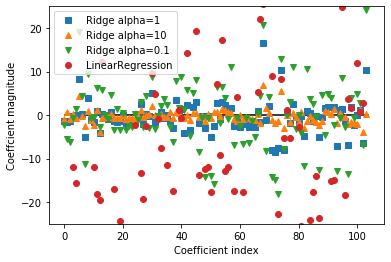

In [12]:
plt.plot(ridge.coef_, "s", label="Ridge alpha=1")
plt.plot(ridge10.coef_, "^", label="Ridge alpha=10")
plt.plot(ridge01.coef_, "v", label="Ridge alpha=0.1")

plt.plot(lr.coef_, "o", label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coeffcient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

coef_はcoefficient（係数）のことを指す

x軸はcoef_の要素を表している。x=0は最初の特徴量に対する係数、x=1は2番目の特徴に対する係数・・・となる

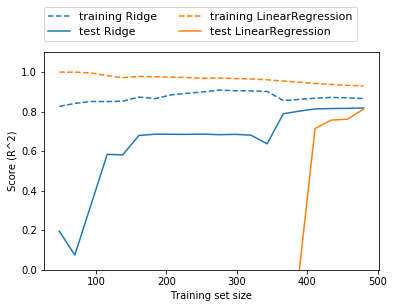

In [13]:
mglearn.plots.plot_ridge_n_samples()

上の図はモデルの性能とデータセットサイズの関数として示したもので学習曲線(learning curve)と呼ばれる  
訓練セットのサイズが400データポイント以下では線形回帰ではなにも学習することができない。

十分なデータがあるときには正則化はあまり重要ではなくなり、リッジ回帰と線形回帰は同じ性能を示す。  
線形回帰では訓練性能が低下している。つまり、データ量が多くなるとモデルが過剰適合すること、もしくはデータを覚えてしまうことが難しくなる。

### Lasso

Ridgeに代わる線形回帰。L1正規化によりいくつかの係数が完全に０になりモデルにおいていくつかの特徴量が完全に無視される。

In [14]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score :{:.2f}".format(lasso.score(X_test, y_test)))
print("Number of feature used:{}".format(np.sum(lasso.coef_!=0)))#使用された特徴量の数

Training set score: 0.29
Test set score :0.21
Number of feature used:4


上のように訓練セットに対しても、テストセットに対しても性能は非常に悪い。  
適合不足であることを意味する。  
さらに104の特徴量のうち4つの特徴量しか用いていない。  
この時はデフォルトでalpha=1.0となっていた。よってalphaを減らせば適合不足の度合いを減らすことができる。その際、max_iter( 最大の繰り返し回数 )をデフォルトから増やしてあげる必要がある。

In [15]:
# "max_iter"の値を増やしている。
#こうしないとモデルが"max_iter"を増やすよう警告を発する。
lasso001=Lasso(alpha=0.01,max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score :{:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of feature used:{}".format(np.sum(lasso001.coef_!=0)))

Training set score: 0.90
Test set score :0.77
Number of feature used:33


In [16]:
lasso00001=Lasso(alpha=0.0001,max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score :{:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of feature used:{}".format(np.sum(lasso00001.coef_!=0)))

Training set score: 0.95
Test set score :0.64
Number of feature used:96


Text(0, 0.5, 'Coeffcient magnitude')

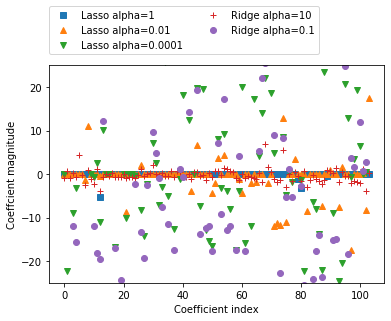

In [17]:
plt.plot(lasso.coef_, "s", label="Lasso alpha=1")
plt.plot(lasso001.coef_, "^", label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="Lasso alpha=0.0001")
plt.plot(ridge10.coef_, "+", label="Ridge alpha=10")
plt.plot(lr.coef_, "o", label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coeffcient magnitude")

Text(0, 0.5, 'Coeffcient magnitude')

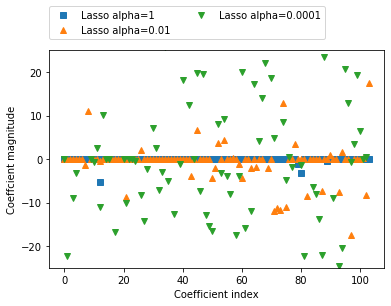

In [18]:
plt.plot(lasso.coef_, "s", label="Lasso alpha=1")
plt.plot(lasso001.coef_, "^", label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, "v", label="Lasso alpha=0.0001")
#plt.plot(ridge10.coef_, "+", label="Ridge alpha=10")
#plt.plot(lr.coef_, "o", label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coeffcient magnitude")

Lasso回帰では、alphaの値が小さくなるほど0でない値をとる係数は増える。さらに、係数の絶対値も大きくなる。

### クラス分類のための線形モデル

・係数と切片の特定の組み合わせと訓練データの適合度を測る尺度  
・正規化を行うか。行うならどの方法か  
　　　の2つがおもな線形モデルを学習するアルゴリズム

liner_model.LogisticRegressionに実装されているロジスティック回帰(logistic regression)と、svm.LinerSVCに実装されている線形サポートベクトルマシン(linear support vector machines : SVM)は最も一般的な線形クラス分類アルゴリズムである。  
※ロジスティック回帰は名前と反して分類アルゴリズムであることに注意

C:\Users\SHOHEI NOGUCHI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\SHOHEI NOGUCHI\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


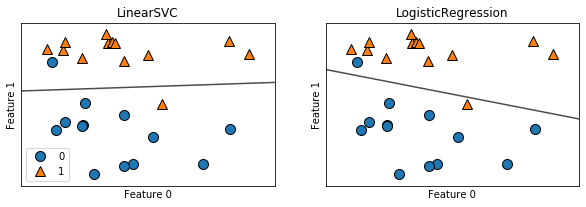

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
#1行に2個のグラフ用の図形を用意

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    #print(model, ax)
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

C(トレードオフパラメータ)を大きくすると正則化は弱くなる。つまり、Cを大きくするとLogisticRegressionとLinearSVCは訓練データに対しての適合度を上げようとするが、パラメータCを小さくすると係数ベクトルを0に近づけることを重視するようになる。

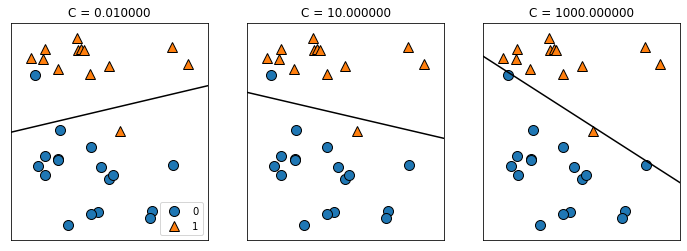

In [20]:
mglearn.plots.plot_linear_svc_regularization()

一番左は小さいCを用いて強力な正則化、すなわち係数を0にすることを重視している。  
一方、一番右では大きいCを用いて、訓練データに対しての適合度を上げようとしていることがわかる。

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.944
Test set score: 0.958


C:\Users\SHOHEI NOGUCHI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


上の予測はCをデフォルトの1.0を用いて行っている。  
予測の精度は非常に高いが、訓練セットとテストセットの精度がとても近いということは、適合不足の可能性が疑われる。  
そこで、Cの値を大きくして、訓練データにより適合させてみる。

In [22]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_train, y_train)))

Training set score: 0.958
Test set score: 0.958


C:\Users\SHOHEI NOGUCHI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_train, y_train)))

Training set score: 0.934
Test set score: 0.934


C:\Users\SHOHEI NOGUCHI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


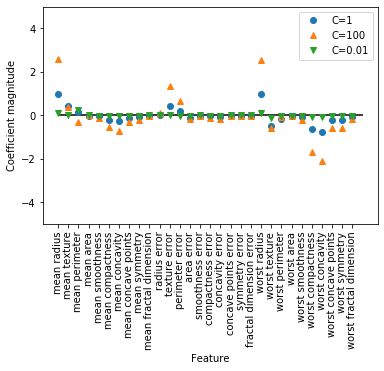

In [24]:
plt.plot(logreg.coef_.T, "o", label="C=1")
plt.plot(logreg100.coef_.T, "^", label="C=100")
plt.plot(logreg001.coef_.T, "v", label="C=0.01")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

↑L2正規化がデフォルトで行われている

Target accuracy of l1 logreg with C=0.001 : 0.91
Test accuracy of l1 logreg with C=0.001 : 0.92
Target accuracy of l1 logreg with C=1.000 : 0.96
Test accuracy of l1 logreg with C=1.000 : 0.96
Target accuracy of l1 logreg with C=100.000 : 0.99
Test accuracy of l1 logreg with C=100.000 : 0.98


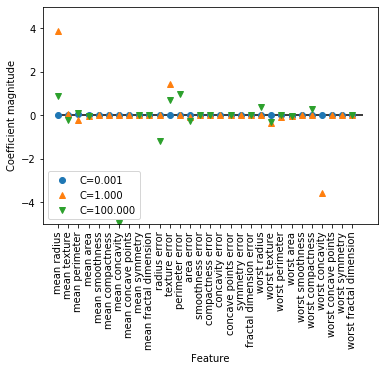

In [25]:
for C, marker in zip([0.001, 1, 100], ["o", "^", "v"]):
    lr_l1 = LogisticRegression(C = C, penalty = "l1", solver='liblinear').fit(X_train, y_train)
    print("Target accuracy of l1 logreg with C={:.3f} : {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f} : {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    #print(lr_l1.coef_.T)
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend(loc=3)

### 線形モデルによる多クラス分類

多くの線形モデルでは2クラス分類のみにしか適用できず、自然に多クラス分類の場合に拡張できるものではない。そのため、2クラス分類を多クラス分類に拡張するための一般的な手法として、”１対その他”アプローチを用いる。  
そのことにより、たくさんの２クラス分類器を用いて、いくつかのクラスに分類することが可能になる。

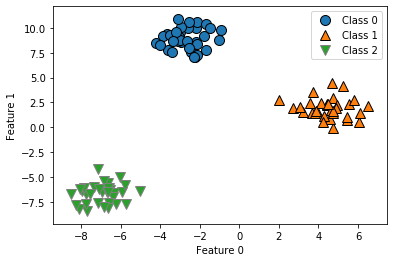

In [47]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [49]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)#係数配列の形状
#各クラスに対応する係数ベクトルが入っており、各列には個々の特徴量（２つ）に対する係数が格納されている
print("Intercept shape: ", linear_svm.intercept_.shape)
print(linear_svm.coef_)
print(linear_svm.intercept_)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)
[[-0.17492117  0.2314017 ]
 [ 0.4762192  -0.06937225]
 [-0.1891423  -0.20399631]]
[-1.07745413  0.13140355 -0.08604807]


[-15.         -14.3877551  -13.7755102  -13.16326531 -12.55102041
 -11.93877551 -11.32653061 -10.71428571 -10.10204082  -9.48979592
  -8.87755102  -8.26530612  -7.65306122  -7.04081633  -6.42857143
  -5.81632653  -5.20408163  -4.59183673  -3.97959184  -3.36734694
  -2.75510204  -2.14285714  -1.53061224  -0.91836735  -0.30612245
   0.30612245   0.91836735   1.53061224   2.14285714   2.75510204
   3.36734694   3.97959184   4.59183673   5.20408163   5.81632653
   6.42857143   7.04081633   7.65306122   8.26530612   8.87755102
   9.48979592  10.10204082  10.71428571  11.32653061  11.93877551
  12.55102041  13.16326531  13.7755102   14.3877551   15.        ]
[-0.17492117  0.2314017 ] -1.0774541288080728 b
-(line * coef[0] + intercept) / coef[1] = [-6.68259304 -6.21978489 -5.75697674 -5.29416859 -4.83136044 -4.36855229
 -3.90574414 -3.44293599 -2.98012784 -2.51731969 -2.05451154 -1.59170339
 -1.12889524 -0.66608709 -0.20327894  0.25952921  0.72233736  1.18514551
  1.64795365  2.1107618   2.57

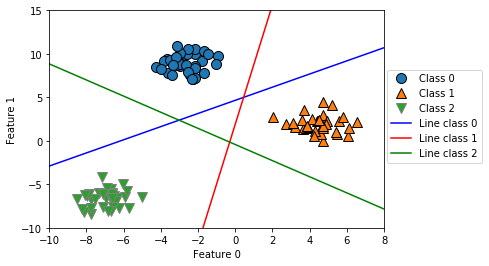

In [53]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
print(line)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,["b", "r", "g"]):
    print(coef, intercept, color)
    print("-(line * coef[0] + intercept) / coef[1] = {}".format(-(line * coef[0] + intercept) / coef[1]))
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))

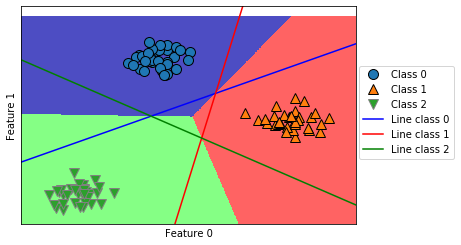

In [54]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,["b", "r", "g"]):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2", "Line class 0", "Line class 1", "Line class 2"], loc=(1.01, 0.3))

線形モデルの訓練は非常に高速で、さらに予測も高速である。  
非常に大きいデータセットにも適用でき、疎なデータに対してもうまく機能する。  
線形モデルは予測方法が比較的理解しやすいが、係数がどうしてその値になっているのかは理解しやすいとは言い難い。  
線形モデルは特徴量がサンプルの個数よりも多いときに性能を発揮する。大きなデータに対して適用されることが多いのは、単に他のモデルで学習できないからである。（低次元空間では、他のモデルの方が良い性能を占めることもある）

### ナイーブベイズクラス分類器

ナイーブベイズクラス分類器とは線形モデルによく似たクラス分類器の一種である。  
訓練が線形モデルよりもさらに高速であることが特徴である。  
しかし、汎化性能が劣る場合がある。

In [62]:
X = np.array([[0, 1, 0, 1],#0
              [1, 0, 1, 1],#1
              [0, 0, 0, 1],#0
              [1, 0, 1, 0],])#1
y = np.array([0, 1, 0, 1])

In [61]:
counts = {}
for label in np.unique(y):
    print(label)
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

0
1
Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


↑は非ゼロ要素の数をカウントしている。Xの4つのクラスにｙで分類している。Xの1つ目と3つ目が0。2つめと4つ目が１。

### 決定木

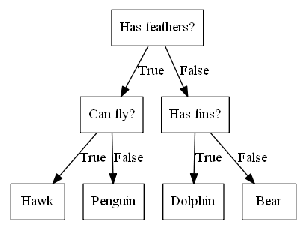

In [63]:
mglearn.plots.plot_animal_tree()

[]

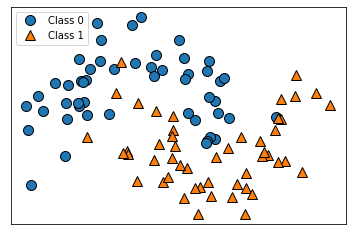

In [68]:
from sklearn.datasets import make_moons
from mglearn.tools import discrete_scatter
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
plt.figure()
ax = plt.gca()
discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
plt.legend(["Class 0", "Class 1"], loc=2)
ax.set_xticks(())
ax.set_yticks(())

決定木を用いて連続値に対するテストを行うときは、「特徴量iは値aよりも大きいか？」という質問をし、層を増やしていき調べていく

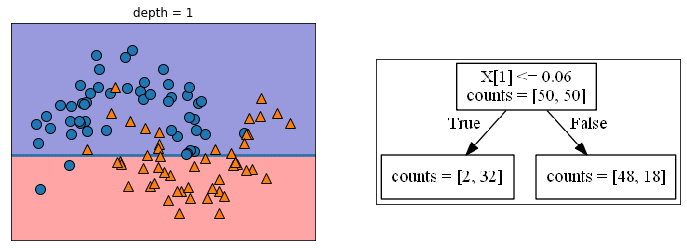

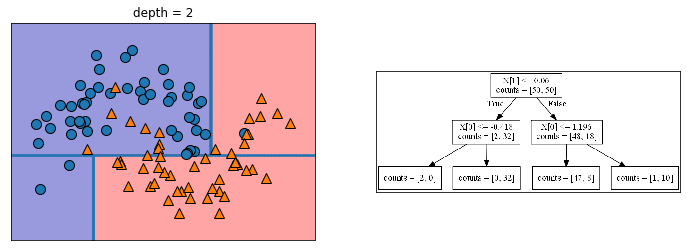

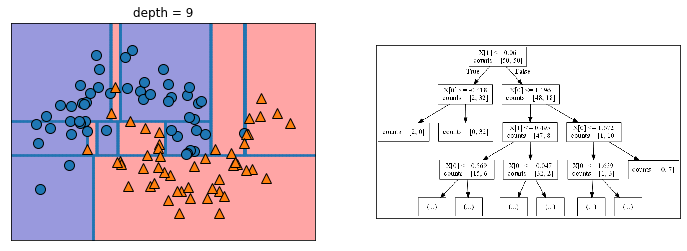

In [69]:
for i, max_depth in enumerate([1, 2, 9]):
  fig, ax = plt.subplots(1, 2, figsize = (12, 4), subplot_kw={'xticks': (), 'yticks': ()})
  tree = mglearn.plot_interactive_tree.plot_tree(X, y, max_depth = max_depth, ax = ax[0])
  ax[1].imshow(mglearn.plot_interactive_tree.tree_image(tree))
  plt.show()
  plt.close()

一番下のようになるまで（つまり葉が純粋になるまで）分割を続けるとモデルは複雑になりすぎ、訓練データに対して大幅に過剰適合してしまう。  
  
過剰適合を防ぐには, ・事前枝刈り、・事後枝刈り　の二つの戦略がある。


In [71]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


上で訓練データの精度が１００％になっていることは、芳賀純粋になっていることを示す。
ここで、事前枝刈りを適用してみる。

In [72]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)#木の深さが４に達したらそこで止める。
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [73]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, 
                impurity=False, filled=True)

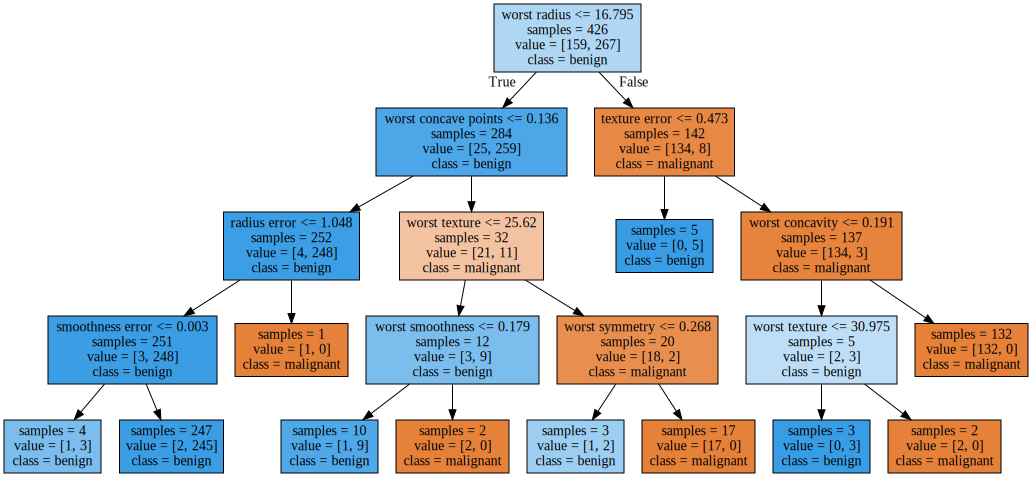

In [74]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [39]:
print("Feature importance:\n{}".format(tree.feature_importances_))

Feature importance:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


特徴量の重要度（feature importance）を調べる。個々の特徴量がどの程度重要かを表す割合である。  
線形モデルの時と同じように特徴量の重要度を可視化できる

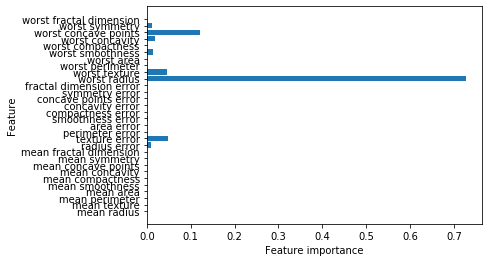

In [40]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

最初の分岐で用いた特徴量（worst radius）が群を抜いて重要な特徴量であることがわかる。  
しかし、特徴量の重要度は、分類の上で重要であることを示すだけで、この値が大きいとどうなるかなどを示してくれるわけではない。  
実際、下のように特徴量とクラスの関係はそれほど単純ではないことが見てわかる

Feature importances: [0. 1.]


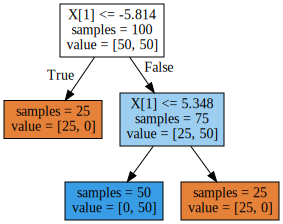

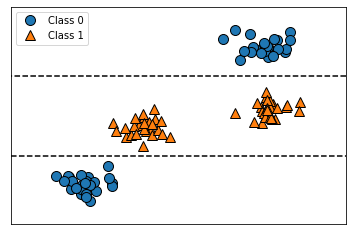

In [41]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

下のグラフはメモリ（RAM）と価格の歴史的推移（対数スケール）を表す

Text(0, 0.5, 'Price in $/Mbyte')

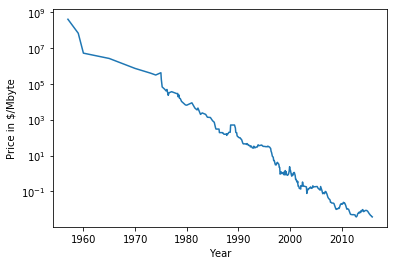

In [42]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [77]:
from sklearn.tree import DecisionTreeRegressor
#過去のデータを用いて2000年以降の価格を予想する
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
print(data_train.date)
print(data_test.date)
X_train = data_train.date[:, np.newaxis]
#対数変換
y_train = np.log(data_train.price)
#決定木
tree = DecisionTreeRegressor().fit(X_train, y_train)
#線形モデル
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]
#予測
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#対数をキャンセル
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

0      1957.00
1      1959.00
2      1960.00
3      1965.00
4      1970.00
        ...   
197    1999.50
198    1999.67
199    1999.75
200    1999.83
201    1999.92
Name: date, Length: 202, dtype: float64
202    2000.00
203    2000.08
204    2000.17
205    2000.25
206    2000.33
        ...   
328    2015.58
329    2015.67
330    2015.75
331    2015.83
332    2015.92
Name: date, Length: 131, dtype: float64


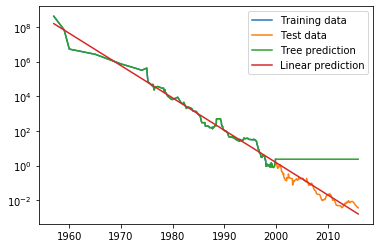

In [78]:
plt.semilogy(data_train.date, data_train.price, label = "Training data")
plt.semilogy(data_test.date, data_test.price, label = "Test data")
plt.semilogy(ram_prices.date, price_tree, label = "Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label = "Linear prediction")
plt.legend()

このように、決定木であると、外挿（extrapolate）ができない。つまり、訓練データのレンジの外側については予測ができない

決定木は、結果のモデルが容易に可視化可能であり、さらにデータのスケールに対して完全に不変であるため、特徴量の正規化や標準化が必要ない。　　
一方、事前枝刈りをしたとしても、過剰適合しやすく、汎化性能が－い傾向がある。そのため、決定木を使う際は単体ではなく、アンサンブル法を用いる。